# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%%matplotlib_inline

UsageError: Line magic function `%%matplotlib_inline` not found.


In [105]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [107]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [108]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [109]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [110]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [111]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [112]:
sns.pairplot(df)

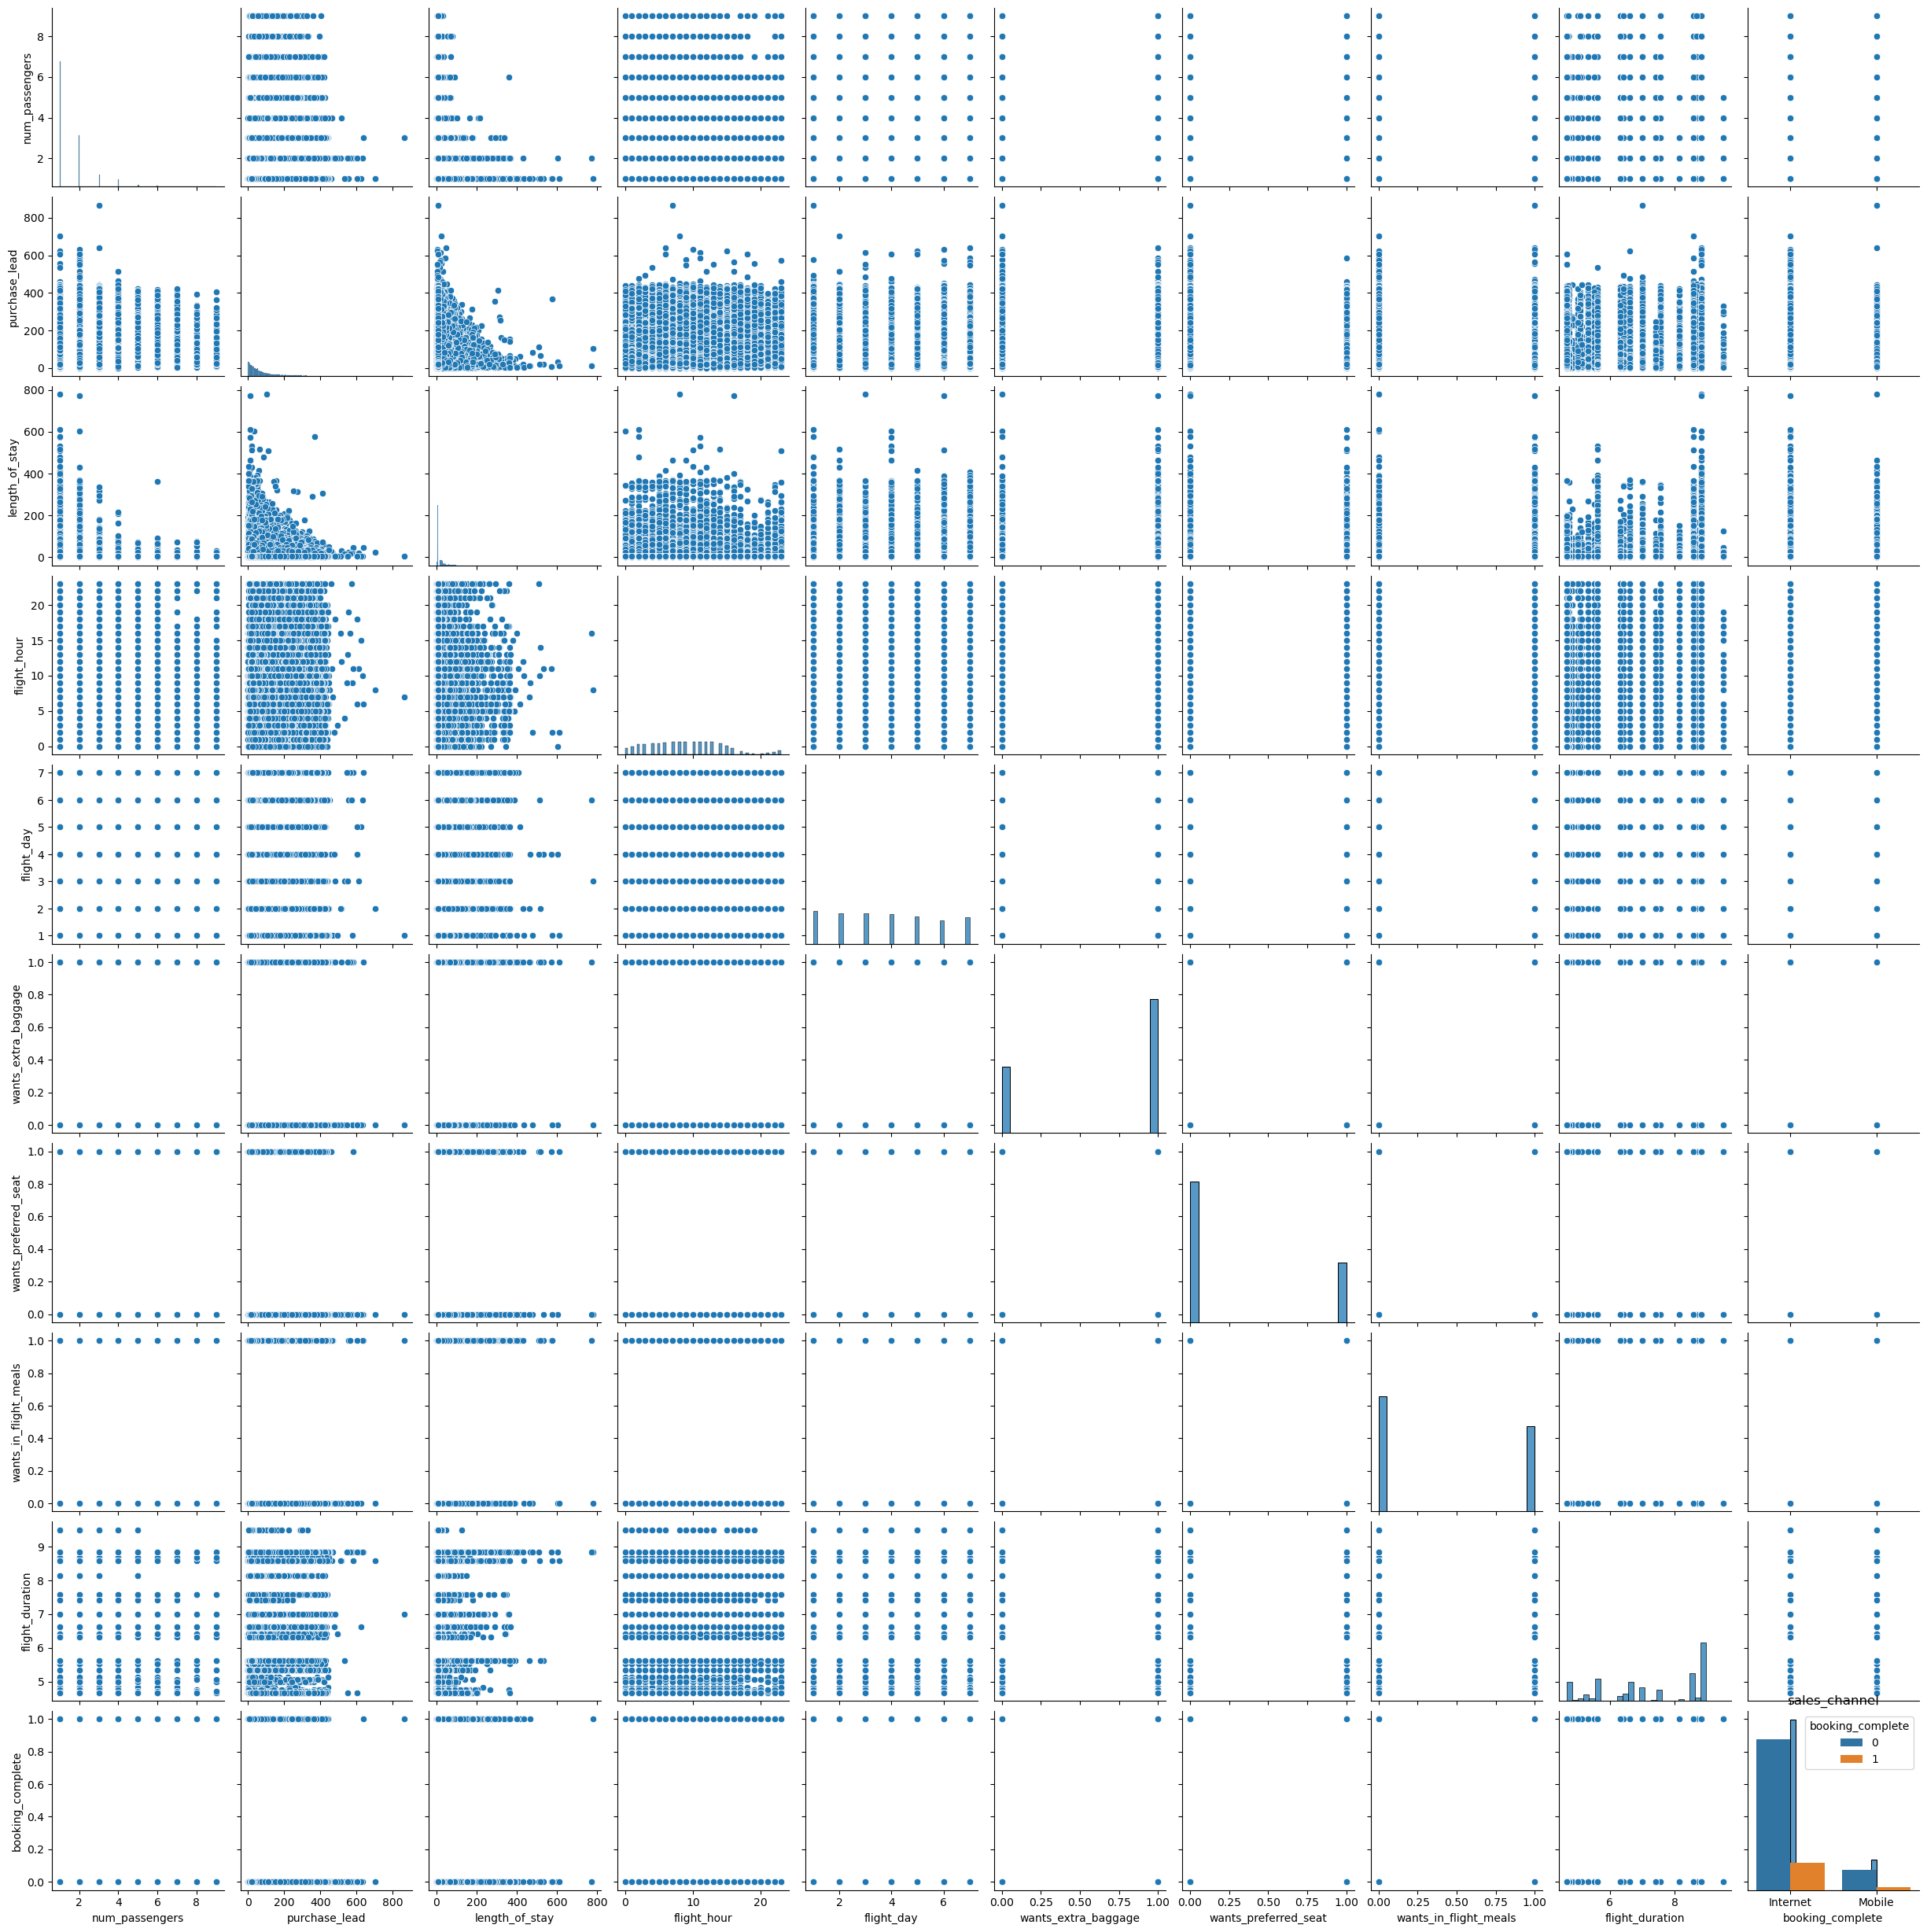

In [113]:
sns.countplot(x='sales_channel',hue='booking_complete',data=df)
plt.title('sales_channel')
plt.show()

Based on Interpretation:
* many better people booking with  internet than use mobile

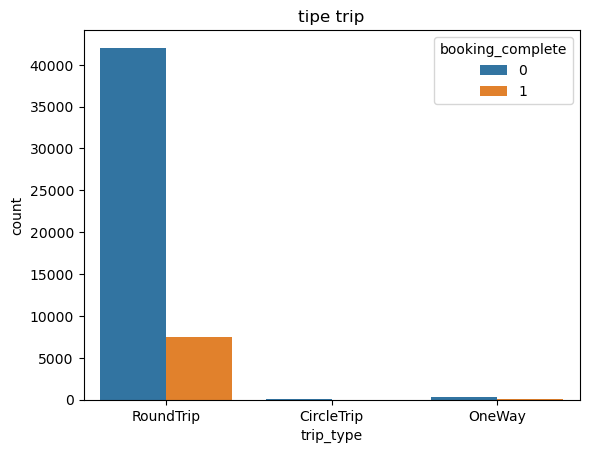

In [114]:
sns.countplot(x='trip_type',hue='booking_complete',data=df)
plt.title('tipe trip')
plt.show()

* many frequently customer booking roundtrip than anything else

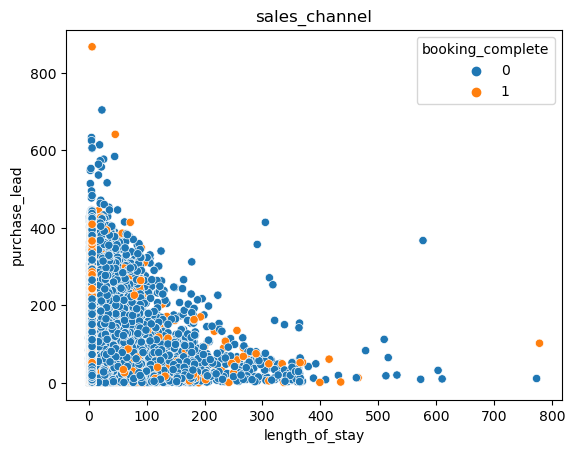

In [115]:
sns.scatterplot(x='length_of_stay',y='purchase_lead',hue='booking_complete',data=df)
plt.title('sales_channel')
plt.show()

* thats graph haven't pattern

In [116]:
sns.heatmap(df.corr(method='spearman'))

<AxesSubplot:>

### One Hot Encoding

In [117]:
booking_origin = pd.get_dummies(df.booking_origin,prefix='booking_origin')
booking_origin

,booking_origin_(not set),booking_origin_Afghanistan,booking_origin_Algeria,booking_origin_Argentina,booking_origin_Australia,booking_origin_Austria,booking_origin_Bahrain,booking_origin_Bangladesh,booking_origin_Belarus,booking_origin_Belgium,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
route = pd.get_dummies(df.route,prefix='route',drop_first=0)
print(route.shape)
# pd.concat([tes1,tes2],axis=1)

(50000, 799)


In [119]:
trip_type = pd.get_dummies(df.trip_type,prefix='trip_type',drop_first=1)
trip_type

,trip_type_OneWay,trip_type_RoundTrip
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
49995,0,1
49996,0,1
49997,0,1
49998,0,1


In [120]:
sales_channel = pd.get_dummies(df.sales_channel,prefix='sales_channel',drop_first=1)
sales_channel

,sales_channel_Mobile
0,0
1,0
2,0
3,0
4,0
...,...
49995,0
49996,0
49997,0
49998,0


### Concating

In [121]:
df = pd.concat([df,booking_origin,route,trip_type,sales_channel],axis=1)
df.drop(['booking_origin','route','trip_type','sales_channel'],axis=1,inplace=True)
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,route_TPEURT,route_TPEVTE,route_TRZWUH,route_TRZXIY,route_TWUWUH,route_TWUXIY,route_URTXIY,trip_type_OneWay,trip_type_RoundTrip,sales_channel_Mobile
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,0,0,0,0,0,0,1,0
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,0,0,0,0,0,0,1,0
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,0,0,0,0,0,0,1,0
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,0,0,0,0,0,0,1,0
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,...,0,0,0,0,0,0,0,0,1,0
49996,1,111,6,4,7,0,0,0,5.62,0,...,0,0,0,0,0,0,0,0,1,0
49997,1,24,6,22,6,0,0,1,5.62,0,...,0,0,0,0,0,0,0,0,1,0
49998,1,15,6,11,1,1,0,1,5.62,0,...,0,0,0,0,0,0,0,0,1,0


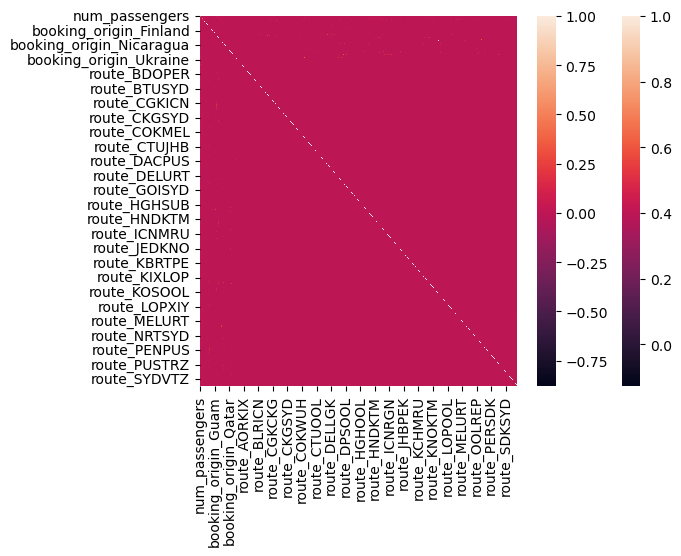

In [122]:
sns.heatmap(df.corr())
plt.show()

### Preprocessing

In [123]:
from sklearn.preprocessing import PolynomialFeatures

In [124]:

# from statsmodels.stats.outliers_influence import variance_inflation_factor
  
  
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = df.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(df.values, i)
#                           for i in range(len(df.columns))]
  
# print(vif_data)

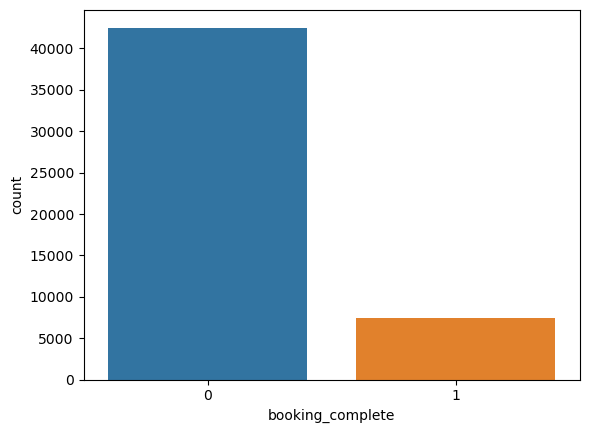

In [125]:
sns.countplot(x=df['booking_complete'])
plt.show()

In [126]:
import imblearn
print(imblearn.__version__)

0.9.1


### Split Train and Test

In [127]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

X = df.drop(['booking_complete'],axis=1)
y = df['booking_complete']

print(X.shape,y.shape)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(X_res.shape,y_res.shape)

X_train,X_test,y_train,y_test = train_test_split(X_res, y_res,test_size=0.2)

(50000, 915) (50000,)
(85044, 915) (85044,)


### Random Forest Classifier

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [129]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      8546
           1       0.91      0.88      0.89      8463

    accuracy                           0.90     17009
   macro avg       0.90      0.90      0.90     17009
weighted avg       0.90      0.90      0.90     17009



In [130]:
X.shape

(50000, 915)

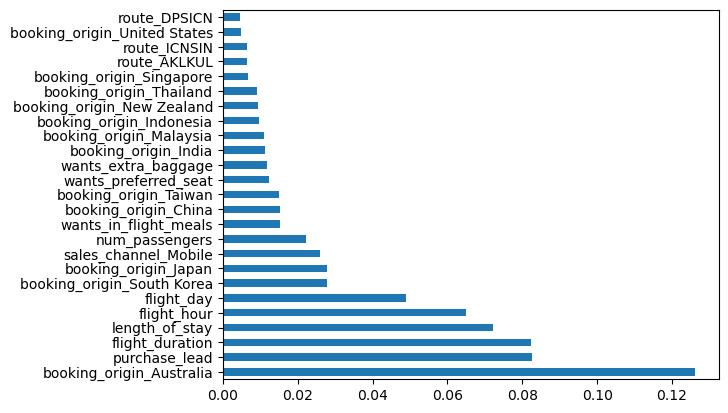

In [131]:
# rf_clf.feature_importances_
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()


### Feature Selection with FeatureWiz

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.99
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (68035, 916)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename g

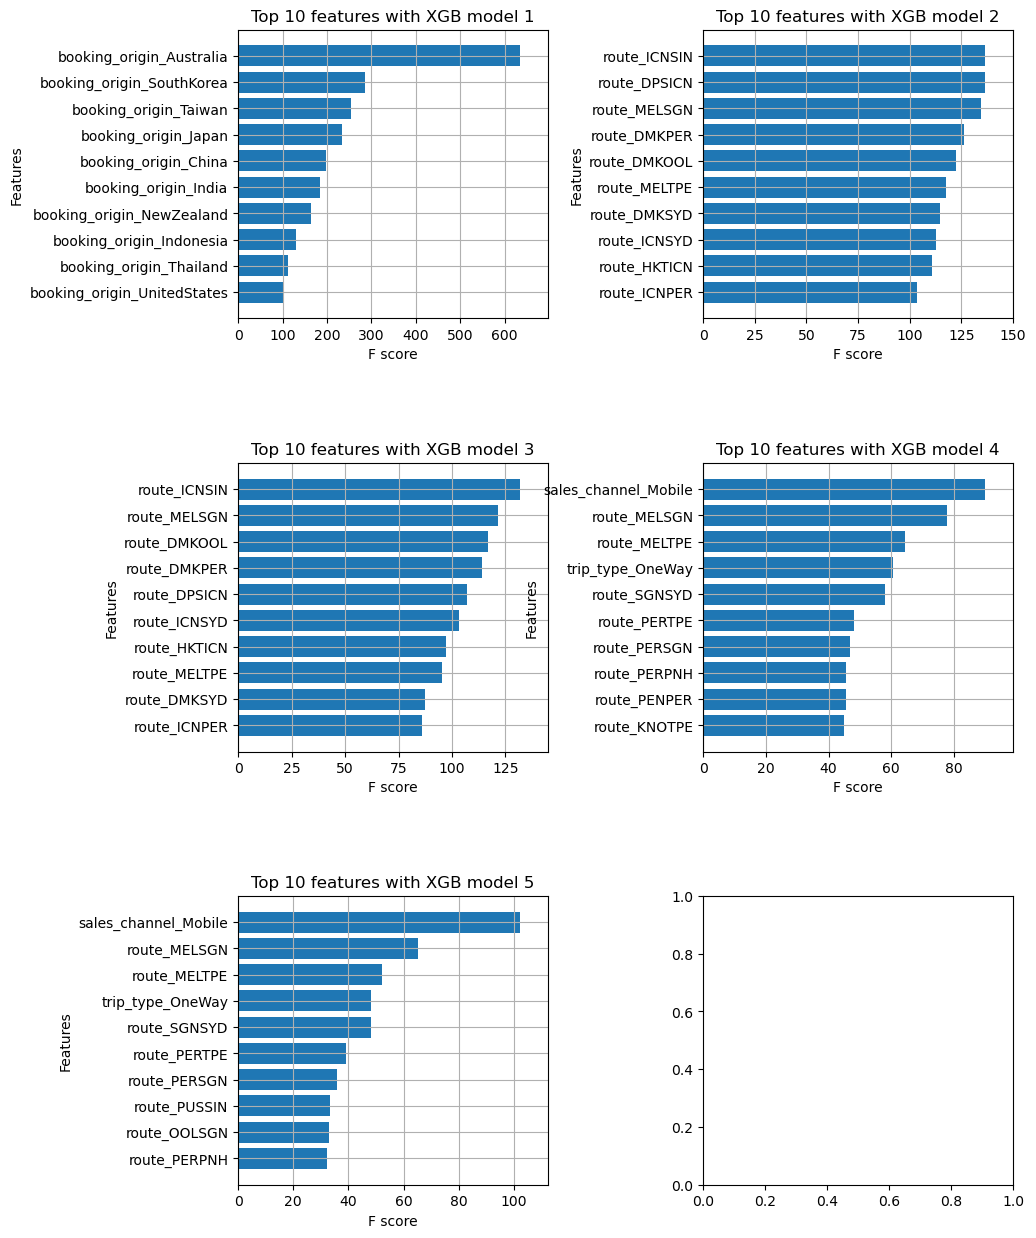

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 241 important features. Too many to print...
Total Time taken for featurewiz selection = 108 seconds
Output contains a list of 241 important features and a train dataframe
    Time taken to create entire pipeline = 116 second(s)
(68035, 241)
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      8546
           1       0.90      0.83      0.87      8463

    accuracy                           0.87     17009
   macro avg       0.87      0.87      0.87     17009
weighted avg       0.87      0.87      0.87     17009



In [132]:
from featurewiz import FeatureWiz
features = FeatureWiz(corr_limit=0.99, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)
X_train_sel = features.fit_transform(X_train, y_train)
X_test_sel = features.transform(X_test)
rf_clf_sel = RandomForestClassifier(random_state=42)
rf_clf_sel.fit(X_train_sel,y_train)
y_pred = rf_clf_sel.predict(X_test_sel)
print(X_train_sel.shape)
print(classification_report(y_test,y_pred))


In [133]:
X_train_sel

,booking_origin_Australia,booking_origin_South Korea,booking_origin_Taiwan,booking_origin_Japan,booking_origin_China,booking_origin_India,booking_origin_New Zealand,booking_origin_Indonesia,booking_origin_Thailand,booking_origin_United States,...,route_KBVPER,route_MELVTZ,route_OOLREP,route_PERVTZ,route_MNLOOL,route_MRUPEK,route_PERUTP,route_OOLPEK,route_OOLSIN,route_PERREP
4182,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
60949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18358,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30462,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12489,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43360,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Selection with Random Forest Classifier

In [134]:
feat_sel = feat_importances.sort_values(ascending=False)[:25].index.tolist()

rf_clf_sel = RandomForestClassifier(random_state=42)
rf_clf_sel.fit(X_train[feat_sel],y_train)
y_pred = rf_clf_sel.predict(X_test[feat_sel])
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      8546
           1       0.90      0.88      0.89      8463

    accuracy                           0.89     17009
   macro avg       0.89      0.89      0.89     17009
weighted avg       0.89      0.89      0.89     17009



In [135]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf_est = RandomForestClassifier(random_state=42)

selector = SelectFromModel(rf_est).fit(X_train,y_train)
print(selector.estimator_)

RandomForestClassifier(random_state=42)


In [136]:
X_train = selector.transform(X_train)
X_train = pd.DataFrame(X_train,columns=selector.get_feature_names_out())
X_train

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_origin_Australia,...,route_PENPVG,route_PENSYD,route_PENTPE,route_PERPNH,route_PERSGN,route_PERTPE,route_PUSSIN,route_SGNSYD,trip_type_OneWay,sales_channel_Mobile
0,1.0,41.0,24.0,10.0,5.0,1.0,1.0,0.0,8.830000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,64.0,20.0,6.0,4.0,0.0,0.0,0.0,7.075796,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,120.0,43.0,11.0,4.0,0.0,0.0,1.0,8.580000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,90.0,3.0,13.0,2.0,1.0,1.0,1.0,5.330000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,328.0,4.0,18.0,6.0,0.0,0.0,0.0,5.520000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68030,6.0,10.0,5.0,7.0,4.0,0.0,0.0,0.0,8.683931,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68031,1.0,57.0,85.0,4.0,5.0,0.0,0.0,0.0,7.202078,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68032,2.0,59.0,22.0,10.0,4.0,0.0,0.0,0.0,8.830000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68033,4.0,225.0,6.0,14.0,7.0,1.0,0.0,0.0,7.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
X_test = selector.transform(X_test)
X_test = pd.DataFrame(X_test,columns=selector.get_feature_names_out())
X_test

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_origin_Australia,...,route_PENPVG,route_PENSYD,route_PENTPE,route_PERPNH,route_PERSGN,route_PERTPE,route_PUSSIN,route_SGNSYD,trip_type_OneWay,sales_channel_Mobile
0,2.0,13.0,5.0,11.0,5.0,1.0,0.0,0.0,4.670000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,6.0,6.0,7.0,1.0,0.0,0.0,1.0,6.620000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,28.0,9.0,4.0,0.0,0.0,1.0,8.418067,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,71.0,57.0,0.0,2.0,1.0,1.0,1.0,8.830000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,97.0,89.0,8.0,5.0,1.0,1.0,1.0,8.830000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17004,1.0,141.0,20.0,6.0,6.0,1.0,1.0,1.0,8.580000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17005,1.0,22.0,3.0,5.0,2.0,0.0,0.0,0.0,8.580000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17006,1.0,66.0,29.0,3.0,2.0,1.0,1.0,1.0,8.830000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17007,3.0,38.0,6.0,12.0,1.0,1.0,0.0,0.0,6.578039,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection SelectFromModel Random Forest

In [138]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      8546
           1       0.91      0.87      0.89      8463

    accuracy                           0.89     17009
   macro avg       0.89      0.89      0.89     17009
weighted avg       0.89      0.89      0.89     17009



In [139]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf_est = RandomForestClassifier(random_state=42)

selector = SelectFromModel(rf_est).fit(X_train,y_train)
print(selector.estimator_)
X_train = selector.transform(X_train)
X_train = pd.DataFrame(X_train,columns=selector.get_feature_names_out())
X_train
X_test = selector.transform(X_test)
X_test = pd.DataFrame(X_test,columns=selector.get_feature_names_out())
X_test
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test,y_pred))

RandomForestClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      8546
           1       0.89      0.88      0.88      8463

    accuracy                           0.88     17009
   macro avg       0.88      0.88      0.88     17009
weighted avg       0.88      0.88      0.88     17009



In [140]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf_est = RandomForestClassifier(random_state=42)

selector = SelectFromModel(rf_est).fit(X_train,y_train)
print(selector.estimator_)
X_train = selector.transform(X_train)
X_train = pd.DataFrame(X_train,columns=selector.get_feature_names_out())
X_train
X_test = selector.transform(X_test)
X_test = pd.DataFrame(X_test,columns=selector.get_feature_names_out())
X_test
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(X_train.shape)
print(classification_report(y_test,y_pred))

RandomForestClassifier(random_state=42)
(68035, 6)
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8546
           1       0.86      0.88      0.87      8463

    accuracy                           0.87     17009
   macro avg       0.87      0.87      0.87     17009
weighted avg       0.87      0.87      0.87     17009



In [141]:
X_train

,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,booking_origin_Australia
0,41.0,24.0,10.0,5.0,8.830000,0.0
1,64.0,20.0,6.0,4.0,7.075796,0.0
2,120.0,43.0,11.0,4.0,8.580000,1.0
3,90.0,3.0,13.0,2.0,5.330000,0.0
4,328.0,4.0,18.0,6.0,5.520000,0.0
...,...,...,...,...,...,...
68030,10.0,5.0,7.0,4.0,8.683931,0.0
68031,57.0,85.0,4.0,5.0,7.202078,0.0
68032,59.0,22.0,10.0,4.0,8.830000,1.0
68033,225.0,6.0,14.0,7.0,7.000000,0.0


In [142]:
# from autofeat import AutoFeatClassifier
# auto_clf = AutoFeatClassifier()
# auto_clf.fit(X_train,y_train)
# y_pred = auto_clf.predict(X_test)
# print(classification_report(y_test,y_pred))